<a href="https://colab.research.google.com/github/sush67/sush67-aircraft-wildlife-strikes-New/blob/main/Aircraft%20Wildlife%20Strikes%3AExploring%20Facts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aircraft Wildlife Strikes, 1990-2015

The dataset contains a record of each reported wildlife strike of a military, commercial, or civil aircraft between 1990 and 2015. Each row contains the incident date, aircraft operator, aircraft make and model, engine make and model, airport name and location, species name and quantity, and aircraft damage.

I downloaded this dataset from kaggle.This is for the course project in [Data Analysis with Python: Zero to Pandas](zerotopandas.com). This is a very interesting course and it's completely understandable for a beginner like me! I learnt many things in python library as I was new to data science and I explored many features of pandas and numpy.

## Downloading the Dataset

Find an interesting intresting dataset and explore it!!

> How I have downloaded the Dataset
>
> - Found an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - I verified that data is in CSV format, and contains at least 3 columns and 150 rows
> - Then I Downloaded the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/faa/wildlife-strikes' 

In [4]:
#@title
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sushmahegde
Your Kaggle Key: ··········


100%|██████████| 4.83M/4.83M [00:00<00:00, 61.5MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './wildlife-strikes'

In [6]:
import os
os.listdir(data_dir)

['database.csv']

## Data Preparation and Cleaning

Let's begin with the first step. Our dataset is downloaded and now we have to explore no. of rows and columns, clean the dataset and acquire required columns using pandas.



In [11]:
import pandas as pd

In [12]:
data_row_df = pd.read_csv(data_dir+"/database.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
data_row_df

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,UNKN,NaN,NaN,NaN,N,NaN,NaN,NONE,NaN,NaN,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,46.0,1,2.0,D,5,5.0,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,NaN,CLIMB,DAY,NONE,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.0,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [14]:
type(data_row_df)

pandas.core.frame.DataFrame

In [15]:
data_row_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [16]:
data_row_df.describe()

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,Speed,Distance,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,71258.000000,99713.000000,565.000000,229.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,241204.036915,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,141.925622,0.703738,0.046018,1.746725,0.085977,0.107757,0.009150,0.138934,0.005956,0.122369,0.006577,0.055605,0.014445,0.045168,0.011619,0.003182,0.000971,0.001918,0.000425,0.055180,0.020086,0.003326,0.119159,0.024009,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,94013.682213,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,46.905651,3.464467,0.435164,6.571239,0.280331,0.310075,0.095216,0.345879,0.076947,0.327713,0.080829,0.229157,0.119318,0.207674,0.107166,0.056320,0.031141,0.043758,0.020612,0.228331,0.140294,0.057572,0.323976,0.153076,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1000.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205411.750000,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249102.500000,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,138.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,322592.250000,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,160.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367445.000000,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,2500.000000,150.000000,8.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [17]:
data_row_df.shape

(174104, 66)

In [18]:
selected_columns = [
    "Incident Year",
    "Incident Month",
    "Operator",
    "Aircraft Type",
    "Aircraft Model",
    "Engine Model",
    "Engine Type",
    "State",
    "Warning Issued",
    "Height",
    "Speed",
    "Distance",
    "Species Name",
    "Species Quantity",
    "Fatalities",
    "Injuries",
    "Aircraft Damage",
    "Radome Strike", 
    "Radome Damage",  
    "Windshield Strike",
    "Windshield Damage",  
    "Nose Strike",        
    "Nose Damage",     
    "Landing Gear Strike",
    "Landing Gear Damage",
    "Wing or Rotor Strike",
    "Wing or Rotor Damage" 
]

In [19]:
len(selected_columns)

27

In [20]:
aircraft_df = data_row_df[selected_columns].copy()

In [21]:
aircraft_df

,Incident Year,Incident Month,Operator,Aircraft Type,Aircraft Model,Engine Model,Engine Type,State,Warning Issued,Height,Speed,Distance,Species Name,Species Quantity,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Landing Gear Strike,Landing Gear Damage,Wing or Rotor Strike,Wing or Rotor Damage
0,1990,1,DELTA AIR LINES,A,26,40,D,KY,NaN,NaN,NaN,NaN,GULL,1,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0
1,1990,1,HAWAIIAN AIR,A,90,10,D,HI,NaN,0.0,NaN,0.0,HOUSE SPARROW,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
2,1990,1,UNKNOWN,NaN,NaN,NaN,NaN,HI,NaN,NaN,NaN,0.0,BARN OWL,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
3,1990,1,MILITARY,A,NaN,NaN,D,SC,NaN,200.0,138.0,NaN,UNKNOWN MEDIUM BIRD,1,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0
4,1990,1,MILITARY,A,NaN,NaN,NaN,FL,NaN,100.0,200.0,NaN,FINCH,1,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,SOUTHWEST AIRLINES,A,42,1,D,NaN,N,NaN,NaN,NaN,UNKNOWN SMALL BIRD,1,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0
174100,2015,9,SOUTHWEST AIRLINES,A,42,1,D,TX,N,5000.0,250.0,25.0,UNKNOWN SMALL BIRD,1,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0
174101,2015,9,BUSINESS,A,49,1,D,FL,NaN,3000.0,200.0,5.0,TURKEY VULTURE,1,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0
174102,2015,9,HORIZON AIR,A,10,10,C,OR,Y,6000.0,NaN,NaN,HERMIT THRUSH,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0


In [22]:
aircraft_df["Aircraft Model"] = pd.to_numeric(aircraft_df["Aircraft Model"], errors='coerce')
aircraft_df["Engine Model"] = pd.to_numeric(aircraft_df["Engine Model"], errors='coerce')

Take some time and find out why the above step is performed?!

In [23]:
aircraft_df

,Incident Year,Incident Month,Operator,Aircraft Type,Aircraft Model,Engine Model,Engine Type,State,Warning Issued,Height,Speed,Distance,Species Name,Species Quantity,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Landing Gear Strike,Landing Gear Damage,Wing or Rotor Strike,Wing or Rotor Damage
0,1990,1,DELTA AIR LINES,A,26.0,40.0,D,KY,NaN,NaN,NaN,NaN,GULL,1,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0
1,1990,1,HAWAIIAN AIR,A,90.0,10.0,D,HI,NaN,0.0,NaN,0.0,HOUSE SPARROW,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
2,1990,1,UNKNOWN,NaN,NaN,NaN,NaN,HI,NaN,NaN,NaN,0.0,BARN OWL,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
3,1990,1,MILITARY,A,NaN,NaN,D,SC,NaN,200.0,138.0,NaN,UNKNOWN MEDIUM BIRD,1,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0
4,1990,1,MILITARY,A,NaN,NaN,NaN,FL,NaN,100.0,200.0,NaN,FINCH,1,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,SOUTHWEST AIRLINES,A,42.0,1.0,D,NaN,N,NaN,NaN,NaN,UNKNOWN SMALL BIRD,1,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0
174100,2015,9,SOUTHWEST AIRLINES,A,42.0,1.0,D,TX,N,5000.0,250.0,25.0,UNKNOWN SMALL BIRD,1,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0
174101,2015,9,BUSINESS,A,49.0,1.0,D,FL,NaN,3000.0,200.0,5.0,TURKEY VULTURE,1,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0
174102,2015,9,HORIZON AIR,A,10.0,10.0,C,OR,Y,6000.0,NaN,NaN,HERMIT THRUSH,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0


Let me tell you what I know!! The above step was performed because,columns have the data type object, either because they contain values of different types, or they contain empty values, which are represented using NaN. 
We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Inorder to demonstrate how to do that I have selected two columns and performed the same.

In [24]:
recent = data_row_df[data_row_df["Incident Year"]>2010]
recent

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
116687,309866,2011,1,1,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,KSMF,SACRAMENTO INTL,CA,AWP,Y,APPROACH,DAY,RAIN,NaN,NaN,0.0,ZT101,RED-WINGED BLACKBIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
116688,309865,2011,1,1,GLA,GREAT LAKES AIRLINES,BE-19,A,123,3,1.0,7.0,10,1.0,A,7,NaN,NaN,NaN,KHYS,HAYS REGIONAL,KS,ACE,N,CLIMB,DAY,NONE,200.0,130.0,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
116689,309864,2011,1,1,GLA,GREAT LAKES AIRLINES,BE-1900,A,123,27,3.0,31.0,4,2.0,C,4,4.0,NaN,NaN,KHYS,HAYS REGIONAL,KS,ACE,N,CLIMB,DAY,NONE,5.0,100.0,0.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
116690,309863,2011,1,1,GLA,GREAT LAKES AIRLINES,BE-1900,A,123,27,3.0,31.0,4,2.0,C,4,4.0,NaN,NaN,KDEN,DENVER INTL AIRPORT,CO,ANM,N,APPROACH,DAY,NONE,5.0,117.0,0.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
116691,309862,2011,1,1,BUS,BUSINESS,GULFSTREAM 200,A,417,NaN,3.0,31.0,14,2.0,D,5,5.0,NaN,NaN,KSLC,SALT LAKE CITY INTL,UT,ANM,N,APPROACH,DAY,NONE,10.0,130.0,0.0,YH004,HORNED LARK,2-10,NONE,NaN,NaN,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,UNKN,NaN,NaN,NaN,N,NaN,NaN,NONE,NaN,NaN,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,46.0,1,2.0,D,5,5.0,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,NaN,CLIMB,DAY,NONE,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.0,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Take a look at the recent Aircraft strikes :D

In [25]:
data_row_df['Aircraft']=data_row_df['Aircraft'].str.replace('UNKNOWN','secret')

In [27]:
aircraft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Incident Year         174104 non-null  int64  
 1   Incident Month        174104 non-null  int64  
 2   Operator              174104 non-null  object 
 3   Aircraft Type         133074 non-null  object 
 4   Aircraft Model        122436 non-null  float64
 5   Engine Model          121962 non-null  float64
 6   Engine Type           127282 non-null  object 
 7   State                 152128 non-null  object 
 8   Warning Issued        76418 non-null   object 
 9   Height                103677 non-null  float64
 10  Speed                 71258 non-null   float64
 11  Distance              99713 non-null   float64
 12  Species Name          174024 non-null  object 
 13  Species Quantity      169627 non-null  object 
 14  Fatalities            565 non-null     float64
 15  

## Exploratory Analysis and Visualization

We are going to perform some interesting statistics for numeric columns. Plotting beautiful graphs and noting interesting insights from the exploratory analysis is really fun!



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [30]:
avg_speed = data_row_df[["Speed"]].mean()

In [31]:
avg_speed

Speed    141.925622
dtype: float64

Note the average speed.

Now, let's explore one or more columns by plotting a graph.

In [32]:
aircraft_df["Species Name"].nunique()

715

In [33]:
aircraft_df["Aircraft Type"].unique()

array(['A', nan, 'B', 'J'], dtype=object)

Making conclusion when we have graph is really simple.
Let's find at what height usually strikes take place by plotting a bargrapgh

In [34]:
top = aircraft_df["Height"].value_counts().head(10)
top

0.0       42510
100.0      4941
50.0       4478
500.0      3704
200.0      3695
1000.0     3363
10.0       2923
300.0      2826
2000.0     2293
1500.0     2271
Name: Height, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


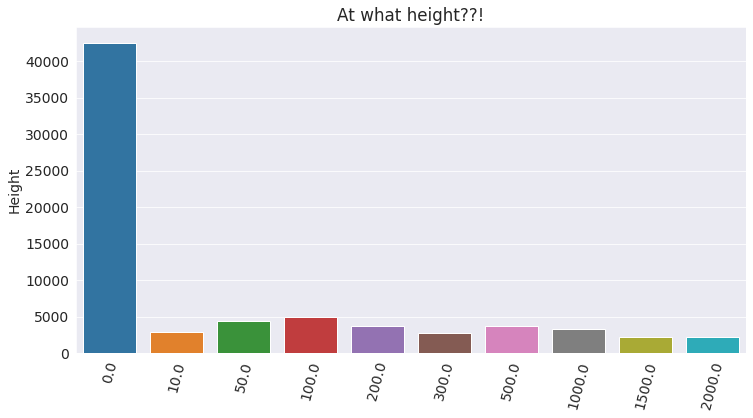

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("At what height??!")
sns.barplot(top.index, top);

May be there's a relationship between number of strikes and year.Let's Confirm it by plotting a histogram

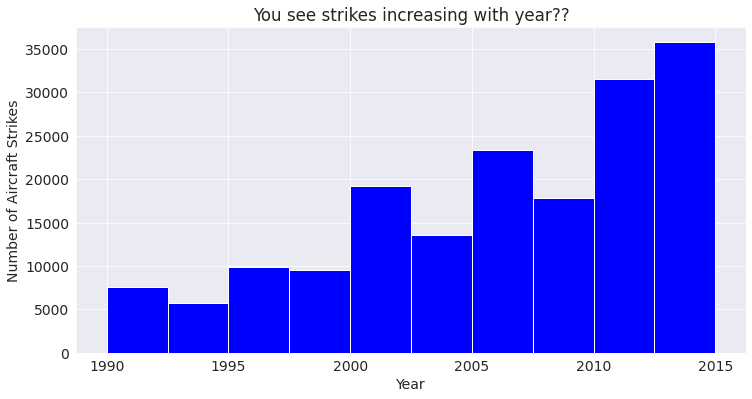

In [36]:
plt.figure(figsize=(12, 6))
plt.title("You see strikes increasing with year??")
plt.xlabel('Year')
plt.ylabel('Number of Aircraft Strikes')

plt.hist(aircraft_df["Incident Year"], color='Blue');

According to our dataset we have aircraft type A, B NaN and J. Let's see which type of aircraft came across more bird strikes by plotting a cool grapgh

In [37]:
type_counts = aircraft_df["Aircraft Type"]
type_counts

0           A
1           A
2         NaN
3           A
4           A
         ... 
174099      A
174100      A
174101      A
174102      A
174103      A
Name: Aircraft Type, Length: 174104, dtype: object

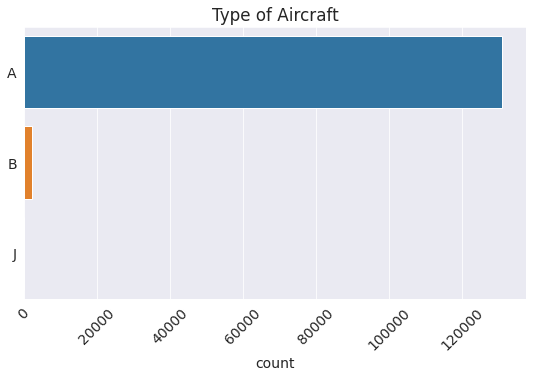

In [38]:
sns.countplot(y=type_counts)
plt.xticks(rotation=45);
plt.title("Type of Aircraft")
plt.ylabel(None);

Let's do some statistical analysis based on the Aircraft Model and note the observations

In [39]:
aircraft_model_count = data_row_df['Aircraft Model'].value_counts().head(20)
aircraft_model_count

24.0    9351
10.0    8949
3.0     7717
42.0    7215
37.0    6738
26.0    6219
11.0    4981
6.0     4725
14.0    3981
1.0     3783
43.0    3334
13.0    3327
7.0     2686
33.0    2529
12.0    2311
5.0     2256
97.0    2150
45.0    2048
16.0    1986
95.0    1594
Name: Aircraft Model, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


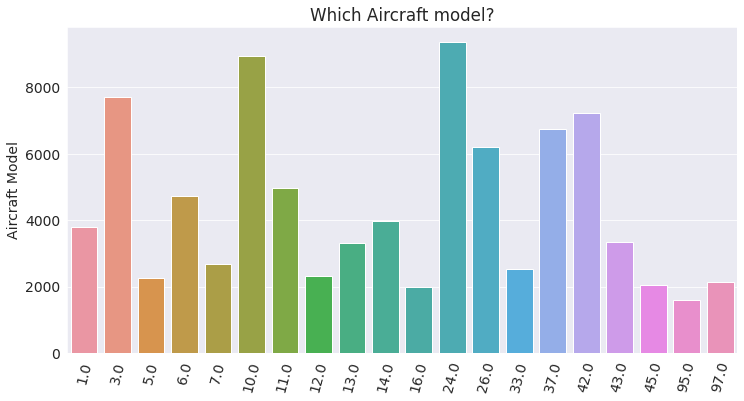

In [40]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Which Aircraft model?")
sns.barplot(aircraft_model_count.index, aircraft_model_count);


## Asking and Answering Questions

There's lot of stuff going on in our mind when we are looking into a dataset and analysing it.Let me ask you some questions about my dataset!



#### Q1: Do you think Aircraft Strikes and Incident Month are independent?!

In [58]:
strike = ['Radome Strike', 'Windshield Strike', 'Nose Strike', 'Engine1 Strike', 'Engine2 Strike', 'Engine3 Strike',
          'Engine4 Strike', 'Propeller Strike', 'Wing or Rotor Strike', 'Fuselage Strike', 'Landing Gear Strike',
          'Tail Strike', 'Lights Strike', 'Other Strike']

In [59]:
table = data_row_df.groupby('Incident Month')[strike].sum()
table

,Radome Strike,Windshield Strike,Nose Strike,Engine1 Strike,Engine2 Strike,Engine3 Strike,Engine4 Strike,Propeller Strike,Wing or Rotor Strike,Fuselage Strike,Landing Gear Strike,Tail Strike,Lights Strike,Other Strike
Incident Month,,,,,,,,,,,,,,
1,590,709,628,437,381,42,20,147,905,621,401,96,65,607
2,546,585,596,348,326,21,15,144,812,564,353,95,57,524
3,888,1117,1014,602,495,29,16,195,1285,932,478,143,69,768
4,1452,1873,1629,684,590,44,32,219,1621,1408,574,160,81,1159
5,2104,2707,2232,837,672,53,29,263,1841,1930,626,146,69,1395
6,1267,1733,1504,676,553,54,25,237,1364,1278,663,107,59,1501
7,1984,2689,2399,1030,820,48,36,433,2074,1892,954,160,93,2248
8,2479,3491,3062,1187,948,67,37,527,2548,2325,1011,216,125,2361
9,2876,3684,3121,1304,1024,62,41,487,2783,2567,965,214,153,1860


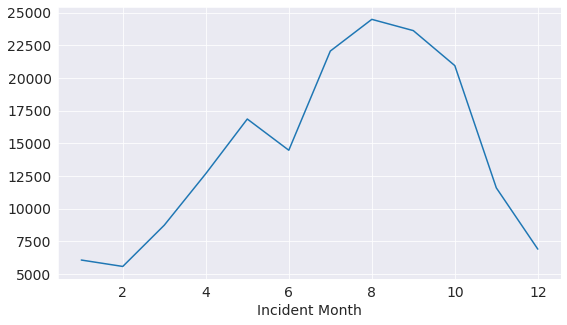

In [60]:
data_row_df.groupby('Incident Month')['Record ID'].count().plot.line()


By making some observation in the table as well as the grapgh above we can conclude that August is the worst month!!

#### Q2: By looking into the dataset can you guess which from which operator there were maximum strikes??

In [61]:
operator_strike_count = data_row_df['Operator'].value_counts().head(20)
operator_strike_count

UNKNOWN                    39540
BUSINESS                   14271
SOUTHWEST AIRLINES         13864
UNITED AIRLINES            13207
AMERICAN AIRLINES          10358
MILITARY                    8046
FEDEX EXPRESS               6289
DELTA AIR LINES             6155
UPS AIRLINES                4534
1US AIRWAYS                 3960
SKYWEST AIRLINES            3096
AMERICAN EAGLE AIRLINES     3058
JETBLUE AIRWAYS             2562
PRIVATELY OWNED             2538
NORTHWEST AIRLINES          2483
US AIRWAYS                  2166
ABX AIR                     1734
MESA AIRLINES               1687
ALASKA AIRLINES             1677
AMERICA WEST AIRLINES       1309
Name: Operator, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


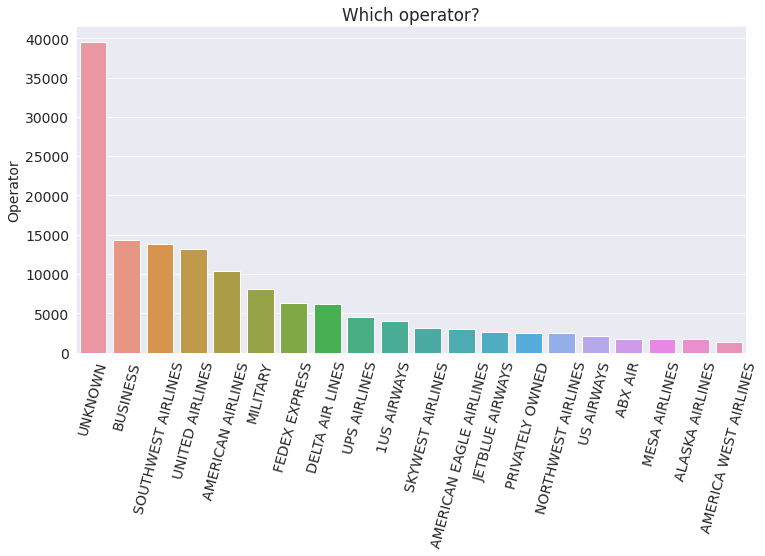

In [62]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Which operator?")
sns.barplot(operator_strike_count.index, operator_strike_count);

Most of the aircraft strikes occured from Buisness,southwest Airlines,United Airlines,American Airlines,Military operators mainly.But many operators are unknown!!

#### Q3: What bird species has caused the most damage to airplanes?
This is an intresting question and also an important thing to notedown.Let's find an answer using a piechart.

In [63]:
species_counts = aircraft_df['Species Name'].value_counts().head(10)
species_counts

UNKNOWN MEDIUM BIRD    38531
UNKNOWN SMALL BIRD     32981
MOURNING DOVE           7653
GULL                    6580
UNKNOWN BIRD            6400
KILLDEER                4562
AMERICAN KESTREL        4476
BARN SWALLOW            4215
HORNED LARK             3952
EUROPEAN STARLING       3915
Name: Species Name, dtype: int64

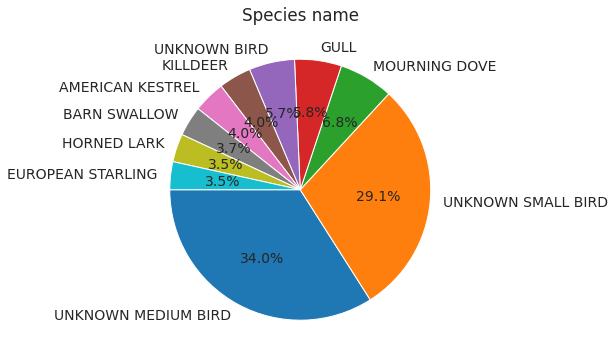

In [64]:
plt.figure(figsize=(12,6))
plt.title("Species name")
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=180);

#### Q4: What kind of Aircraft face Aircraft strikes mostly?

In [65]:
new=data_row_df.groupby('Aircraft')['Species Name'].count()
new.sort_values()

Aircraft
C-9B               1
C-130Y             1
GRUMMAN G73        1
C-135A             1
Q-4                1
               ...  
CRJ100/200      6369
A-320           7073
B-737-700       7414
B-737-300       8935
secret         40467
Name: Species Name, Length: 656, dtype: int64

Secret(unknown) flights are highest to get hit.

Maybe considered as low protection or flights that serve in remote areas.

#### Q5: Was there any warning before the aircraft strike??

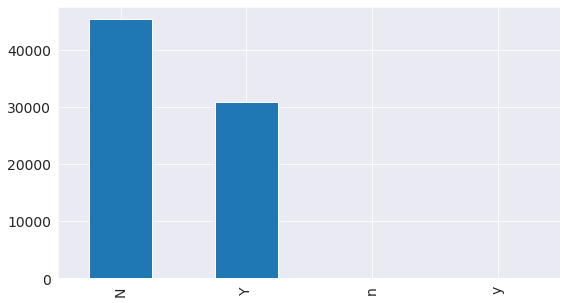

In [66]:
data_row_df['Warning Issued'].value_counts().plot.bar()


But we can note our observation from the above graph eventhough,this actually needs to clean n, y into N, Y.

In most of the cases warning was NOT issued.

## Inferences and Conclusion

We are at the end of project now.But, this is just the beginning for me as this is is my first ever project.
To conclude, we have seen various types of analysis and question and answers with the data set I found interesting. Here is something I feel worth to share. We just look at data set all we can say is that we just know what are the columns and what it contains.So Exploratory Data Analysis is a very efficient way to make our work easy. With python libraries like pandas, numpy, matplotlib, seaborn allow us to come to conclusions calculating and vizualization. 

There are some functions which I used in this notebook.I hope this is informative to you:

1.Opendatasets library which helps us in downloading and using datasets like kaggle.
2.Some of basic function of pandas are describe,sum,mean,info,shape,columns,unique etc.
3.There are functions available to clean our data set to extract required columns.
4.Variety of graphs can be plotted, which are very informative using 3-4 lines of code. 
5.Matplotlib and seaborn are really useful for plotting graph and vizualization makes an easy way to answer our questions.

## References and Future Work

This is a really huge dataset and also a great resource to work with.There are so many things to explore and the conlusions obtained are really useful.The observations can also be used to avoid some of aircraft stikes.

I found this on kaggle https://www.kaggle.com/faa/wildlife-strikes. To get some inspiration I looked into so many other projects and dataset on various datasets that are available on kaggle.

The course is really good for beginners. I would recommend this course to my friends as well as my juniors.You can find the info. by the below link
https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas

You can also find the recommended dataset if you are beginner. Find them in the below link.

https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711

As we have to complete within the deadline I have restricted my work to derive some of the conclusion and results.
This resource is really fun to with and I would like explore it some time!
